In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from useful_functions import load_transform_split, scatter_predvreal, get_metric
from RandomSeedSearchCV import RandomSeedSearchCV, randomseed_rfr_maker

In [2]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=42)
y_train = y_train.flatten()
y_test  = y_test.flatten()

[[3.47100000e+03 1.89706446e+00 1.63076187e+00 2.09368404e+00
  2.26635933e+00]
 [5.96900000e+03 1.96120979e+00 1.67688156e+00 2.08966467e+00
  3.88698411e+00]
 [4.27600000e+03 1.98765065e+00 1.71321809e+00 2.13145699e+00
  2.67601562e+00]
 ...
 [9.28800000e+03 4.36254887e+00 4.37550905e+00 5.36353215e+00
  3.25449944e-01]
 [6.87300000e+03 4.36314719e+00 4.24079090e+00 5.21482693e+00
  5.75656176e-01]
 [1.89000000e+03 4.36711260e+00 4.44808549e+00 5.44441971e+00
  3.41629505e-01]]


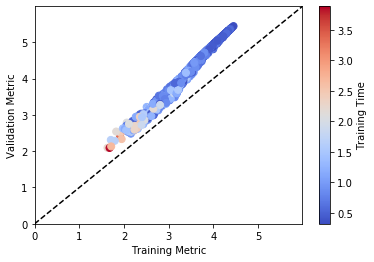

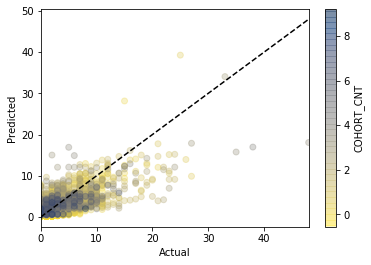

In [5]:
#CAUTION: This cell takes awhile unless you make N smaller.

#Searching through RandomForestRegressor models.
tbl = RandomSeedSearchCV(randomseed_rfr_maker,X_train,y_train,N=1000,shield_seed=True,random_state=42,n_jobs=3)
print(tbl)

#Get best model.
best_seed = int(tbl[0,0])
best_model = randomseed_rfr_maker(best_seed)

#Plot goodness-of-fit
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0])

In [15]:
mse = get_metric('mean_squared_error')

print("Best RFR: Train RMSE = %.2f, Test RMSE = %.2f"%(
                               np.sqrt(mse(best_model,X_train,y_train)),
                               np.sqrt(mse(best_model,X_test,y_test)),
                               ))

Best RFR, Train RMSE = 1.29, Test RMSE = 1.40


In [17]:
from joblib import dump,load
#Store random search output and pickle best model.
np.savetxt("RFR_randomseedsearch.out",tbl,header='seed  cv_score  training_mse  validation_mse  training_time(s)')
dump(best_model, 'best_RandomForestRegressor_DROPOUT_N.joblib') 